In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects


In [111]:
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




---


#Task - 1


---




The objective of project 2 is to extract time series features for human activity
monitoring.
Dataset
The following link provides human activity data for 15 subjects. Click on each subject to
access the time series data. For this project consider accelerometer data for all the 15
subjects for walking, running, climbing up and climbing down
Task 1
1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the
aforementioned data
2. Compute average degree, network diameter, and average path length
3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series
4. Tabulate all the results
5. Generate scatter plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVG and NVG))
6. Generate scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))

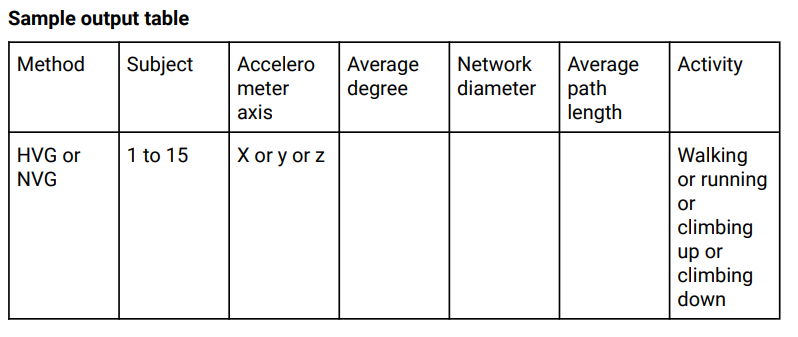

# Read the data

For both task-1 and task-2, accelerometer data for the sensor placed on chest has been used

In [112]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
# creating list of activities, sensor position and direction to be later used for automation
activities=['walking','running','climbingdown','climbingup']
sensor_pos=['chest']
directions=['x','y','z']

In [114]:
#creating a list containing all the data file names
file_names=[]

for subject in range(1,16):
  for act in activities:
    for pos in sensor_pos:
      file_names.append("S{0}_acc_{1}_{2}".format(subject,act,pos))


In [115]:
file_names

['S1_acc_walking_chest',
 'S1_acc_running_chest',
 'S1_acc_climbingdown_chest',
 'S1_acc_climbingup_chest',
 'S2_acc_walking_chest',
 'S2_acc_running_chest',
 'S2_acc_climbingdown_chest',
 'S2_acc_climbingup_chest',
 'S3_acc_walking_chest',
 'S3_acc_running_chest',
 'S3_acc_climbingdown_chest',
 'S3_acc_climbingup_chest',
 'S4_acc_walking_chest',
 'S4_acc_running_chest',
 'S4_acc_climbingdown_chest',
 'S4_acc_climbingup_chest',
 'S5_acc_walking_chest',
 'S5_acc_running_chest',
 'S5_acc_climbingdown_chest',
 'S5_acc_climbingup_chest',
 'S6_acc_walking_chest',
 'S6_acc_running_chest',
 'S6_acc_climbingdown_chest',
 'S6_acc_climbingup_chest',
 'S7_acc_walking_chest',
 'S7_acc_running_chest',
 'S7_acc_climbingdown_chest',
 'S7_acc_climbingup_chest',
 'S8_acc_walking_chest',
 'S8_acc_running_chest',
 'S8_acc_climbingdown_chest',
 'S8_acc_climbingup_chest',
 'S9_acc_walking_chest',
 'S9_acc_running_chest',
 'S9_acc_climbingdown_chest',
 'S9_acc_climbingup_chest',
 'S10_acc_walking_chest',
 '

# Reading the data, applying HVG & NVG and computing the metrics

In [116]:
import warnings
warnings.filterwarnings(action='ignore')

In [117]:
#calculating HVG for all subjects in all directions for all activities
from ts2vg import HorizontalVG
from ts2vg import NaturalVG

#final data frame that stores hvg and nvg metrics for each subject, each direction(x,y,z) and all four cactivities considered
#This dataframe df will be populated in the upcoming for loop block 
df_task1=pd.DataFrame(columns=['Method','Subject','Axis','Average Degree','Network Diameter','Average Path Length','Activity'])

for file in file_names:

  #a master folder contains all the file. For each file, compute hvg and nvg metrics and populate the final dataframe
  df_read=pd.read_csv("/content/drive/MyDrive/My colab notebooks/Foundations data analytics/Project - 2 Time Series/Data files/data_master/{0}.csv".format(file))

  #extracting subject number, sensor position and activity from the file name
  sub= file.split("_")[0][1:]
  sensor_pos=file.split("_")[-1][0]
  activity = file.split("_")[2]

  # directions=['x','y','z'] and already defined at the beginning

  for dir in directions:
    ###############HVG############
    # apply hvg to df_read
    hg=HorizontalVG()
    hg.build(df_read["attr_"+dir][1000:2024])
    ig_g=hg.as_igraph()

    #append hvg metrics to the data frame df
    df_task1=df_task1.append(pd.Series(["HVG",sub,dir,np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity],index=df_task1.columns),ignore_index=True)

    ###############NVG#############
    # apply hvg to df_read
    ng=NaturalVG()
    ng.build(df_read["attr_"+dir][1000:2024])
    ig_g=ng.as_igraph()

    ##append nvg metrics to the data frame df
    df_task1=df_task1.append(pd.Series(["NVG",sub,dir,np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity],index=df_task1.columns),ignore_index=True)

In [118]:
df_task1.head()

,Method,Subject,Axis,Average Degree,Network Diameter,Average Path Length,Activity
0,HVG,1,x,3.958984,26,11.578024,walking
1,NVG,1,x,11.451172,10,4.441492,walking
2,HVG,1,y,3.951172,22,10.666252,walking
3,NVG,1,y,11.986328,9,4.241050,walking
4,HVG,1,z,3.957031,23,10.602296,walking


In [119]:
#replacing activity column with proper casing
activity_mapping={'walking':'Walking','running':'Running','climbingup':'Climbing up','climbingdown':'Climbing down'}
df_task1['Activity']=df_task1['Activity'].replace(activity_mapping)

In [120]:
df_task1.head()

,Method,Subject,Axis,Average Degree,Network Diameter,Average Path Length,Activity
0,HVG,1,x,3.958984,26,11.578024,Walking
1,NVG,1,x,11.451172,10,4.441492,Walking
2,HVG,1,y,3.951172,22,10.666252,Walking
3,NVG,1,y,11.986328,9,4.241050,Walking
4,HVG,1,z,3.957031,23,10.602296,Walking


In [121]:
# to check if the data frame has been created right. Each subject will have 3 entries for hvg and 3 entries for nvg. 
#This is again repeated for all 4 activities. Hence 6*4=24
df_task1.Subject.value_counts()

1     24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
15    24
Name: Subject, dtype: int64

# Scatter Plots: Walking vs Running

Generate scatter plots: average degree vs network diameter and color the points according to walking and running (do this for each accelerometer signal and each method (HVG and NVG))

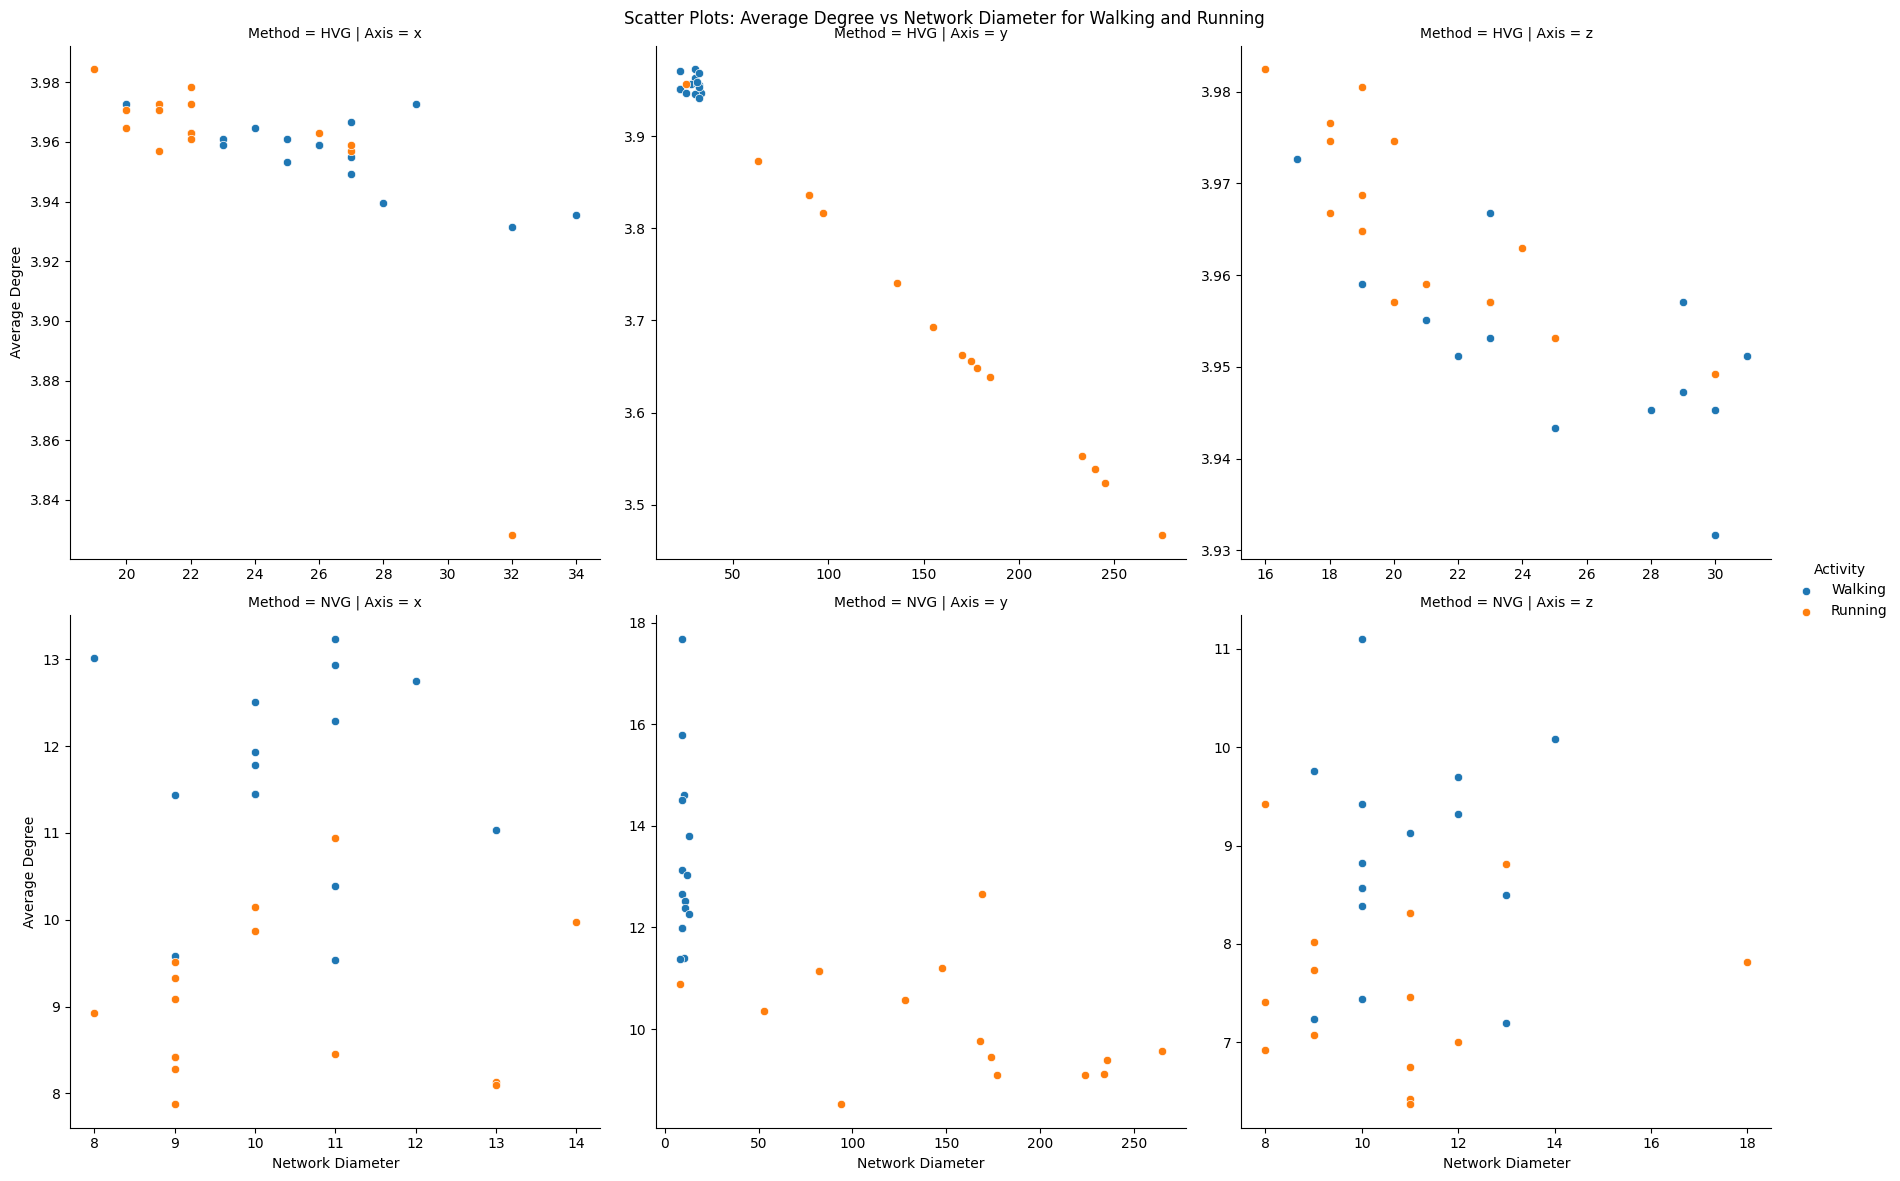

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

#subsetting only walking and running data from the df data frame
# and plotting using facet grid which creates grid-based multiple plots based on the values of categorical columns
df_plot=df_task1.loc[df_task1['Activity'].isin(["Walking","Running"])]
g = sns.FacetGrid(df_plot, col="Axis",  row="Method", hue="Activity",sharex=False, sharey = False, height=6, aspect=1)
g.map(sns.scatterplot, "Network Diameter", "Average Degree")

# adding legend and title
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Scatter Plots: Average Degree vs Network Diameter for Walking and Running")
plt.show()

# Scatter Plots: Climbing Up vs Climbing Down

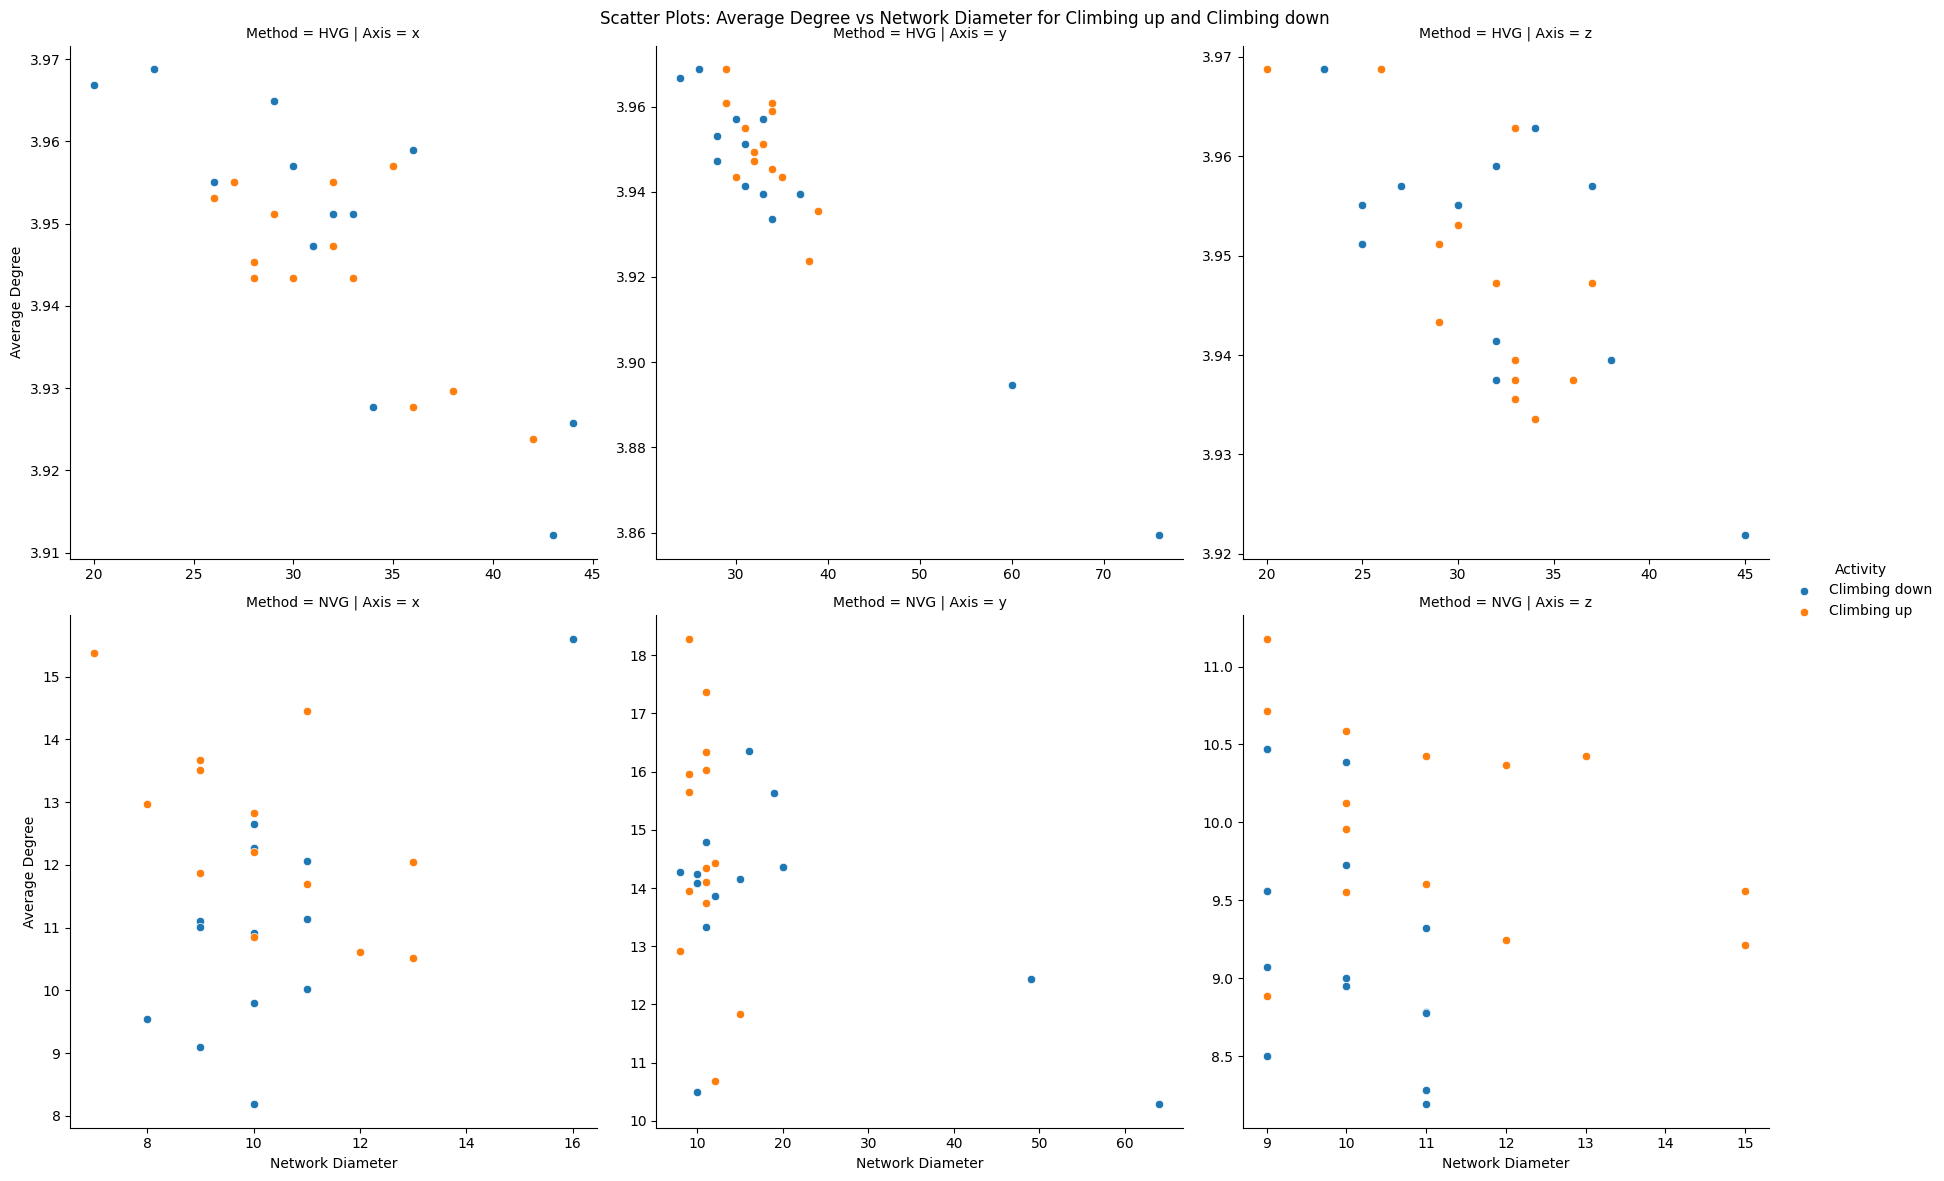

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

#subsetting only climbingup and Climbing down data from the df data frame
df_plot=df_task1.loc[df_task1['Activity'].isin(["Climbing up","Climbing down"])]
g = sns.FacetGrid(df_plot, col="Axis",  row="Method", hue="Activity",sharex=False, sharey = False, height=6, aspect=1)
g.map(sns.scatterplot, "Network Diameter", "Average Degree")
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Scatter Plots: Average Degree vs Network Diameter for Climbing up and Climbing down")
plt.show()



---


# **Task - 2**




---




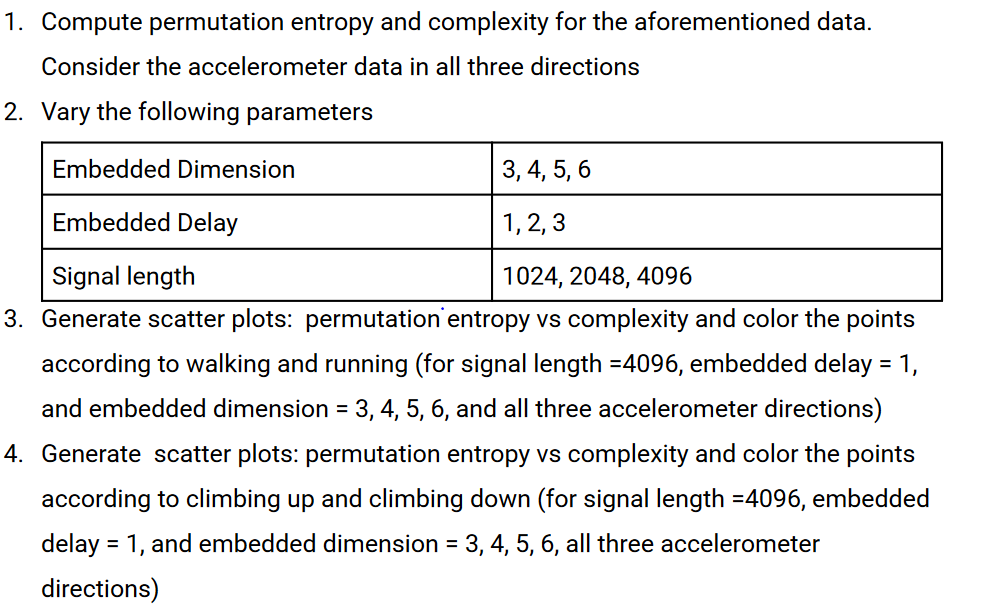

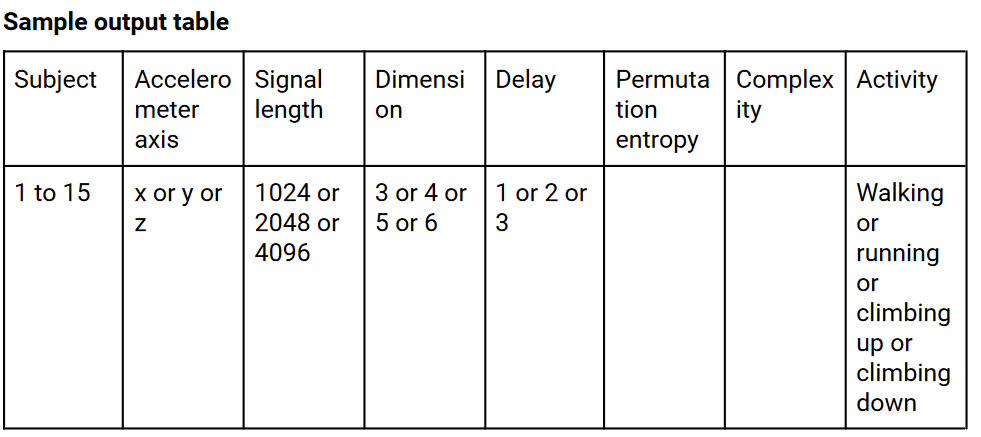

In [124]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [125]:
#calculating entropy and complexity for all subjects in all directions for all activities
df_task2=pd.DataFrame(columns=['Subject', 'Accelerometer axis', 'Signal length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

for file in file_names:
  
  #read every file in the list file_names
  df_read=pd.read_csv("/content/drive/MyDrive/My colab notebooks/Foundations data analytics/Project - 2 Time Series/Data files/data_master/{0}.csv".format(file))

  #extracting subject number, sensor position and activity from the file name
  sub= file.split("_")[0][1:]
  sensor_pos=file.split("_")[-1][0]
  activity = file.split("_")[2]
  directions=['x','y','z']
  signal_len=[1024, 2048, 4096]
  dimensions=[3,4,5,6]
  delays=[1,2,3]
  
  #looping through directions, signal len etc.. and calculating entropy and complexity for each unique combination of parameters
  for dir in directions:
    for sig in signal_len:
      for dim in dimensions:
        for delay in delays:
          op=ordinal_patterns(df_read["attr_"+dir][1000:1000+sig],dim,delay)
          permutation_entropy=p_entropy(op)
          complexity_=complexity(op)
    
          #append all values
          df_task2=df_task2.append(pd.Series([sub, dir,sig,dim, delay, permutation_entropy, complexity_,activity], index=df_task2.columns),ignore_index=True)

In [126]:
#replacing activity column with full form
activity_mapping={'walking':'Walking','running':'Running','climbingup':'Climbing up','climbingdown':'Climbing down'}
df_task2['Activity']=df_task2['Activity'].replace(activity_mapping)

In [127]:
df_task2.head()

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.835931,0.133484,Walking
1,1,x,1024,3,2,0.961475,0.035904,Walking
2,1,x,1024,3,3,0.986813,0.012713,Walking
3,1,x,1024,4,1,0.766084,0.226196,Walking
4,1,x,1024,4,2,0.931094,0.087185,Walking


In [128]:
df_task2.Subject.value_counts()

1     432
2     432
3     432
4     432
5     432
6     432
7     432
8     432
9     432
10    432
11    432
12    432
13    432
14    432
15    432
Name: Subject, dtype: int64

# Scatter Plots: Walking vs Running

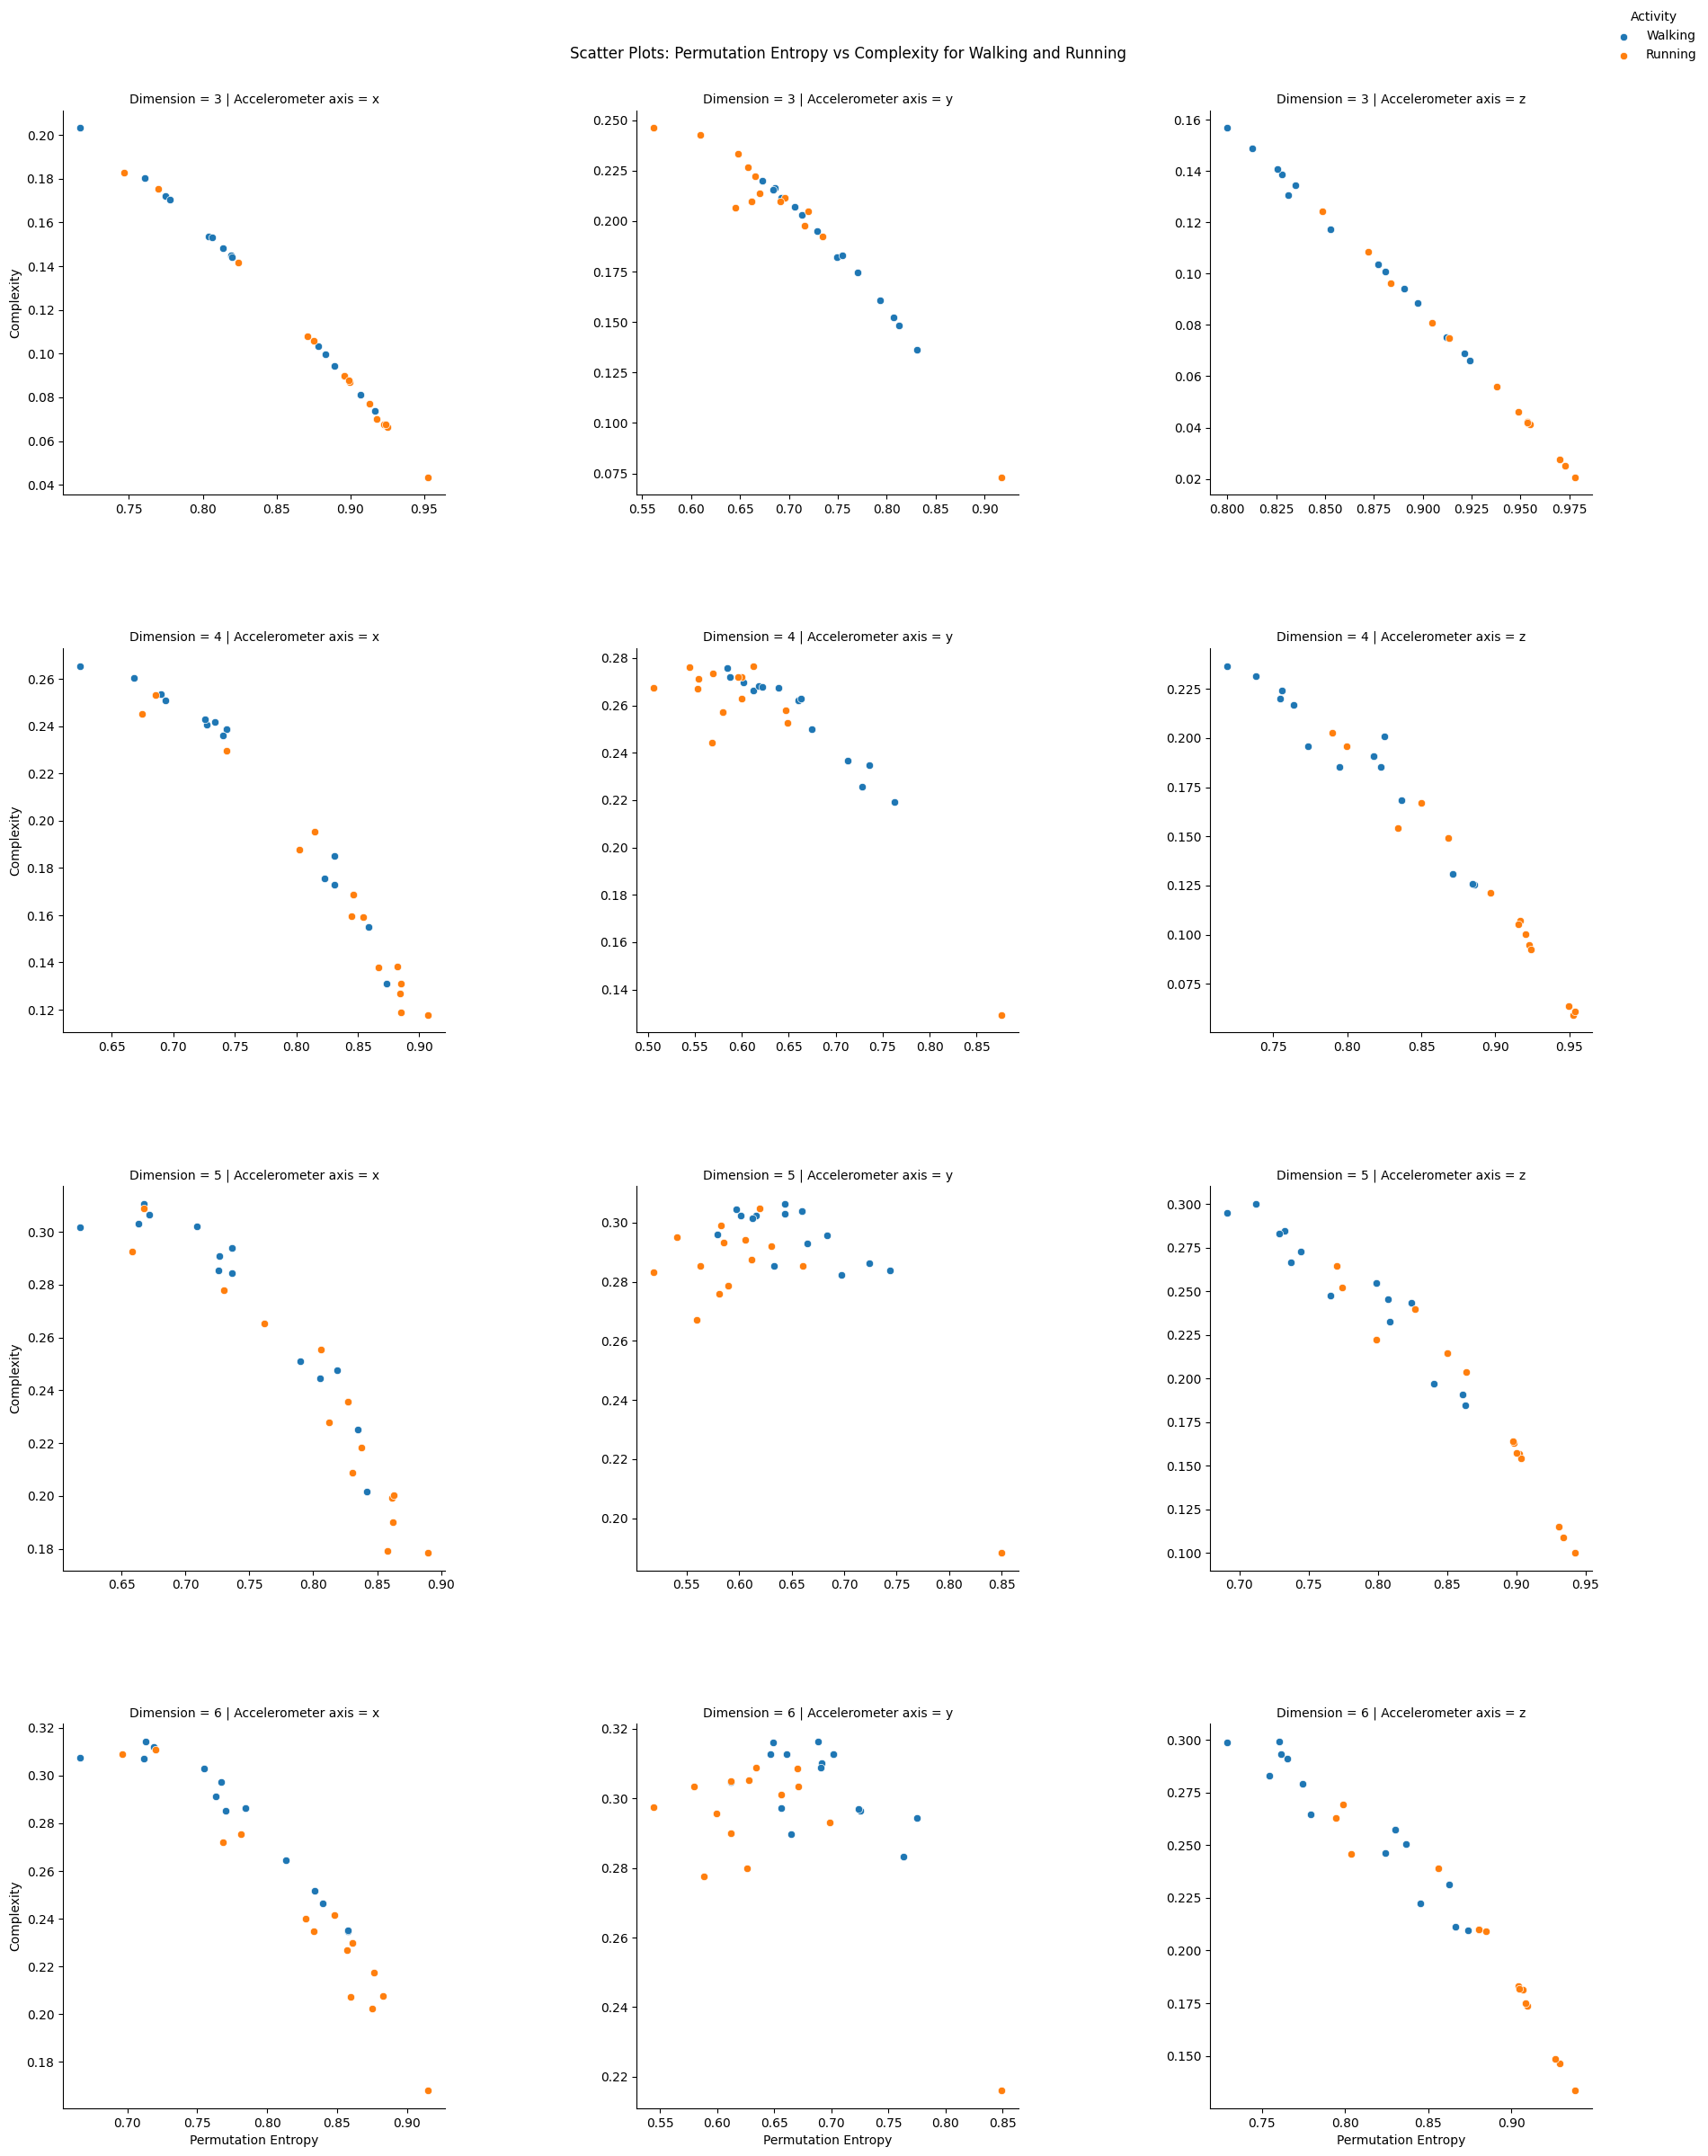

In [129]:
#subsetting the dataset for walking and running, signal length = 4096 and delay parameter = 1
df_plot=df_task2.loc[(df_task2['Activity'].isin(["Walking","Running"])) & (df_task2['Signal length']==4096) & (df_task2['Delay']==1)]

g = sns.FacetGrid(df_plot, col="Accelerometer axis",  row="Dimension", hue="Activity",sharex=False, sharey = False,height=6, aspect=1)
g.map(sns.scatterplot, "Permutation Entropy", "Complexity")
g.add_legend(loc=1) #moving the legend to top right for better visibility
g.fig.subplots_adjust(top=0.95,hspace=0.4, wspace=0.5)
g.fig.suptitle("Scatter Plots: Permutation Entropy vs Complexity for Walking and Running")
plt.show()

# Scatter Plots: Climbing up vs Climbing down

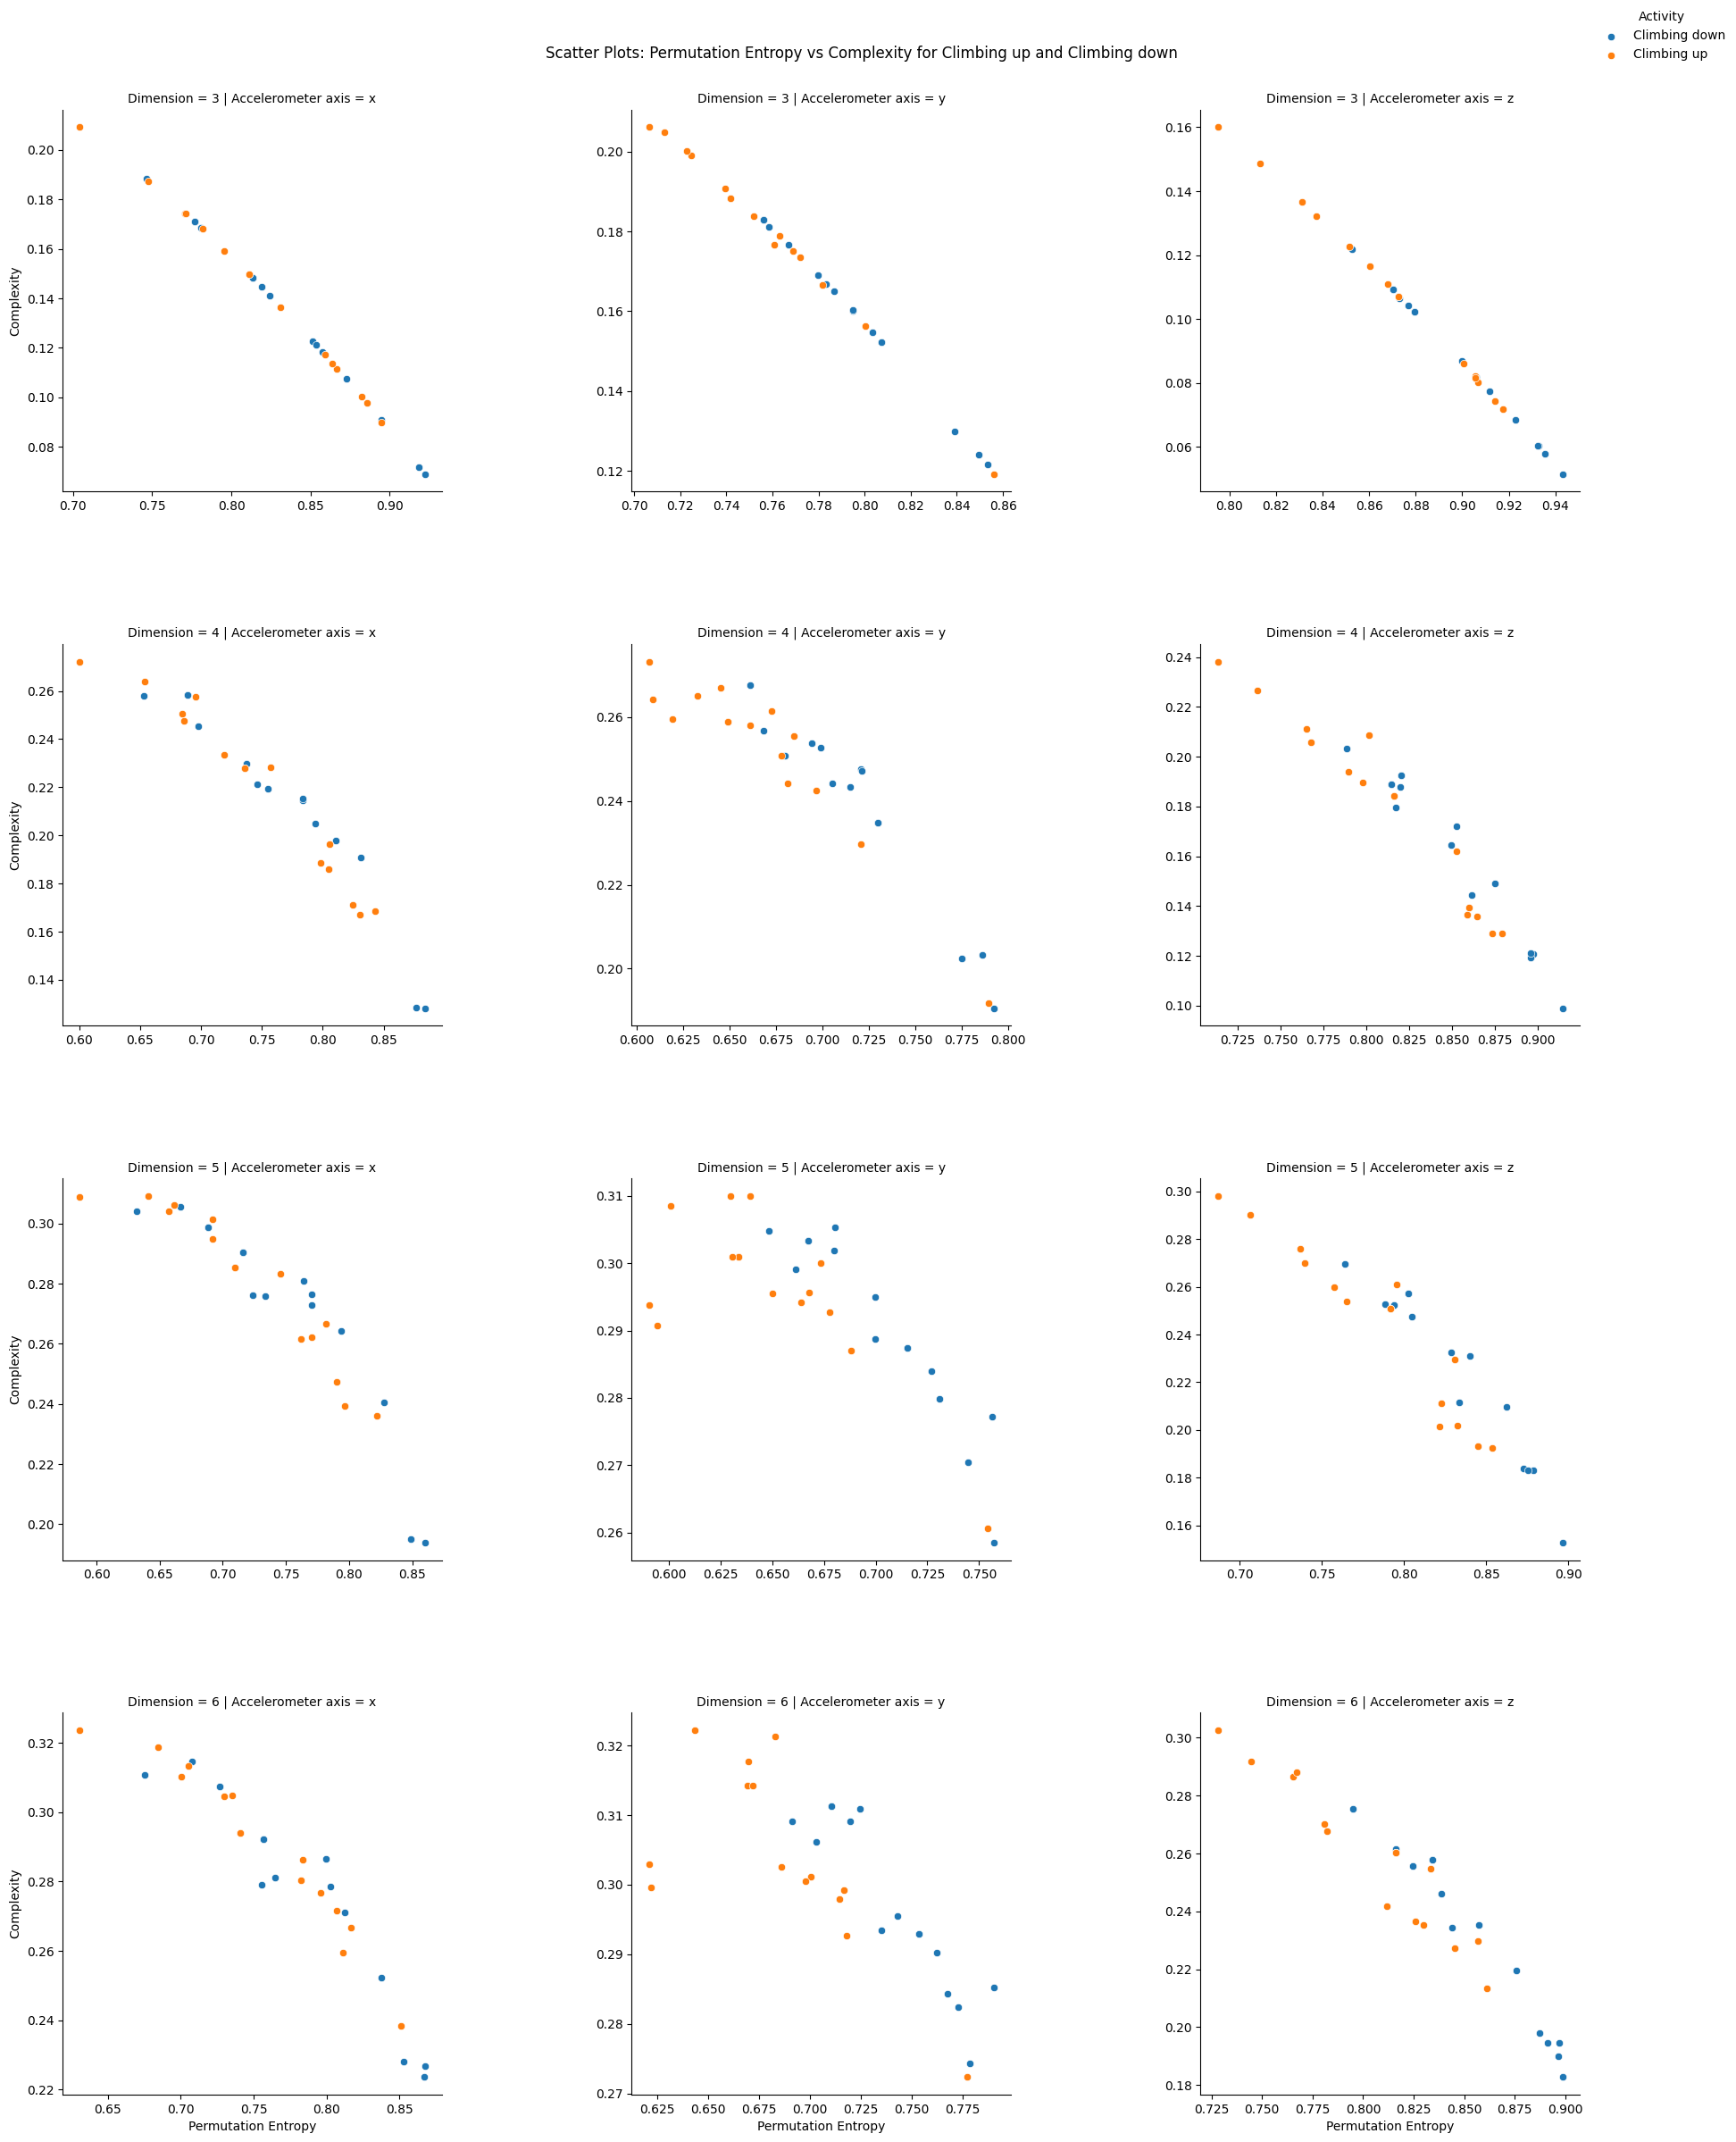

In [130]:
#subsetting the dataset for climbing up and climbing down, signal length = 4096 and delay parameter = 1
df_plot=df_task2.loc[(df_task2['Activity'].isin(["Climbing up","Climbing down"])) & (df_task2['Signal length']==4096) & (df_task2['Delay']==1)]
g = sns.FacetGrid(df_plot, col="Accelerometer axis",  row="Dimension", hue="Activity",sharex=False, sharey = False, height=6, aspect=1)
g.map(sns.scatterplot, "Permutation Entropy", "Complexity")
g.add_legend(loc=1)
g.fig.subplots_adjust(top=0.95,hspace=0.4, wspace=0.5)
g.fig.suptitle("Scatter Plots: Permutation Entropy vs Complexity for Climbing up and Climbing down")
plt.show()